# D* Algorithm



In [13]:
import heapq

INF = float('inf')

class DStarLite:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.rows = len(grid)
        self.cols = len(grid[0])
        self.start = start
        self.goal = goal

        # Heuristic: Manhattan distance
        self.h = lambda a, b: abs(a[0]-b[0]) + abs(a[1]-b[1])

        # Initialize g and rhs values
        self.g = {}
        self.rhs = {}
        for r in range(self.rows):
            for c in range(self.cols):
                self.g[(r, c)] = INF
                self.rhs[(r, c)] = INF

        self.rhs[goal] = 0
        self.OPEN = []
        heapq.heappush(self.OPEN, (self.key(goal), goal))

    def key(self, s):
        return (min(self.g[s], self.rhs[s]) + self.h(self.start, s), min(self.g[s], self.rhs[s]))

    def update_vertex(self, s):
        if s != self.goal:
            self.rhs[s] = min([self.g[n] + 1 for n in self.get_neighbors(s)])
        # Remove if already in OPEN
        for i, (_, node) in enumerate(self.OPEN):
            if node == s:
                self.OPEN.pop(i)
                heapq.heapify(self.OPEN)
                break
        if self.g[s] != self.rhs[s]:
            heapq.heappush(self.OPEN, (self.key(s), s))

    def get_neighbors(self, s):
        r, c = s
        neighbors = []
        for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
            nr, nc = r+dr, c+dc
            if 0 <= nr < self.rows and 0 <= nc < self.cols and self.grid[nr][nc] == 0:
                neighbors.append((nr, nc))
        return neighbors

    def compute_shortest_path(self):
        while self.OPEN and (self.OPEN[0][0] < self.key(self.start) or self.rhs[self.start] != self.g[self.start]):
            _, u = heapq.heappop(self.OPEN)W
            if self.g[u] > self.rhs[u]:
                self.g[u] = self.rhs[u]
                for n in self.get_neighbors(u):
                    self.update_vertex(n)
            else:
                self.g[u] = INF
                for n in self.get_neighbors(u) + [u]:
                    self.update_vertex(n)

    def get_path(self):
        self.compute_shortest_path()
        path = []
        current = self.start
        while current != self.goal:
            path.append(current)
            neighbors = self.get_neighbors(current)
            if not neighbors:
                return None  # no path
            current = min(neighbors, key=lambda n: self.g[n]+1)
        path.append(self.goal)
        return path


# --- Example Usage ---
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 1, 1],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0,0)
goal = (4,4)

dstar = DStarLite(grid, start, goal)
path = dstar.get_path()
print("Path:", path)


Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (3, 2), (3, 3), (3, 4), (4, 4)]


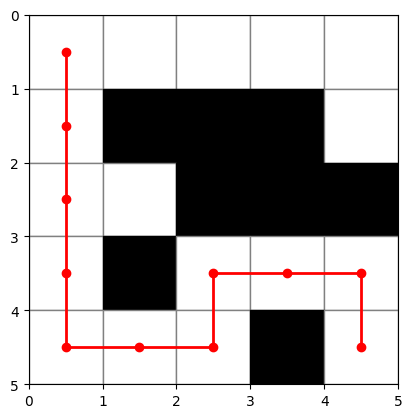

In [12]:
import matplotlib.pyplot as plt

def visualize_path(grid, path):
    rows = len(grid)
    cols = len(grid[0])
    
    fig, ax = plt.subplots()
    
    # Draw the grid
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] == 1:
                ax.add_patch(plt.Rectangle((c, r), 1, 1, color='black'))  # obstacle
            else:
                ax.add_patch(plt.Rectangle((c, r), 1, 1, edgecolor='gray', facecolor='white'))
    
    # Draw the path
    if path:
        path_x = [c + 0.5 for r, c in path]
        path_y = [r + 0.5 for r, c in path]
        ax.plot(path_x, path_y, color='red', linewidth=2, marker='o')
    
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_aspect('equal')
    ax.invert_yaxis()  # Flip y-axis so row 0 is at the top
    plt.show()


# --- Example Usage ---
visualize_path(grid, path)
